In [11]:
# General Python
import sys
import os
sys.path.append('./')


# Data structures
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
dpi = 200
mpl.rc("savefig", dpi=dpi)
%matplotlib inline
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy import stats
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import math
import re

from lmfit import minimize, Parameters, report_fit
from matplotlib.colors import LogNorm

#additional imports
import pandas as pd
from Bio import SeqIO, SeqRecord,Seq
import mkl_random
import random

import os
import subprocess
from Bio import Entrez, SeqIO
from copy import deepcopy
from pathlib import Path

import datetime
import time
import json
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


import seaborn as sb

from matplotlib.pyplot import cm


## 1. Import containing picogreen concentrations and edit dataframes

In [2]:
#import 2 quadrants from plate 1-1
plate_1_conc=pd.read_csv('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/20200111_mja_plate1_final.csv')
plate_1_conc.set_index('Well', inplace=True)
plate_1_conc.replace('#VALUE!', 99, inplace=True)
plate_1_conc["stock_conc"] = pd.to_numeric(plate_1_conc["stock_conc"])
plate_1_conc.hist(column='stock_conc', grid=False, bins=20, edgecolor='black', linewidth=0.75)
plt.title('Plate 1 concentrations (n=185)')
plt.xlabel('concentration (ng/uL)')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/20200111_mja_plate1_final_hist.png')



#import 2 quadrants from plate 2-1
plate_2_conc=pd.read_csv('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/20200111_mja_plate2_final.csv')
plate_2_conc.set_index('Well', inplace=True)
plate_2_conc.replace('#VALUE!', 99, inplace=True)
plate_2_conc["stock_conc"] = pd.to_numeric(plate_2_conc["stock_conc"])
plate_2_conc.hist(column='stock_conc', grid=False, bins=20, color = 'gray', edgecolor='black', linewidth=0.75)
plt.title('Plate 2 concentrations (n=185)')
plt.xlabel('concentration (ng/uL)')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/20200111_mja_plate2_final_hist.png')



FileNotFoundError: [Errno 2] No such file or directory: '/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/20200111_mja_plate1_final.csv'

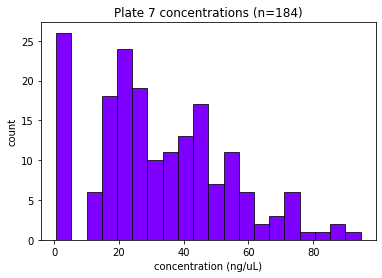

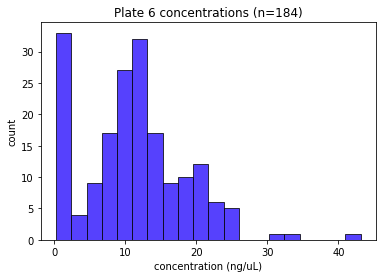

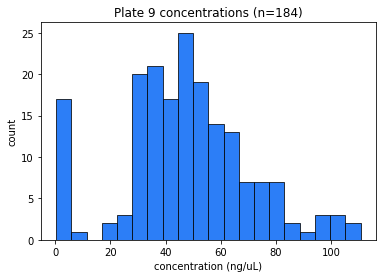

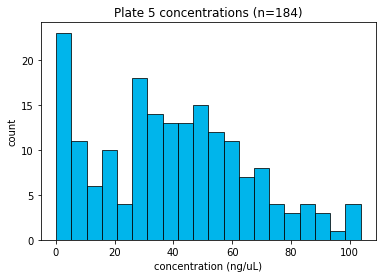

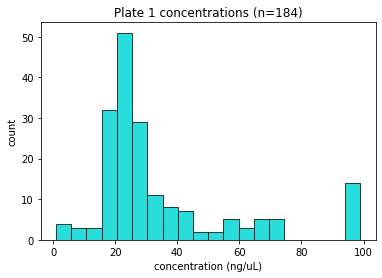

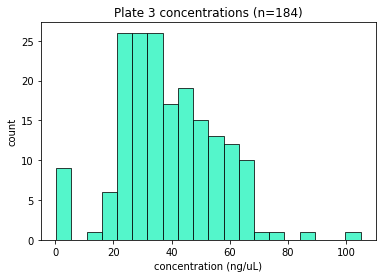

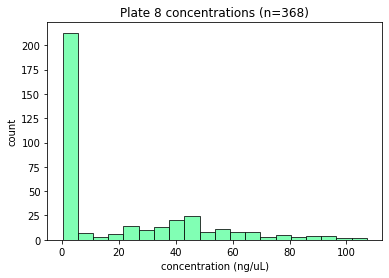

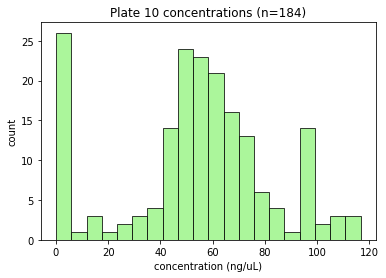

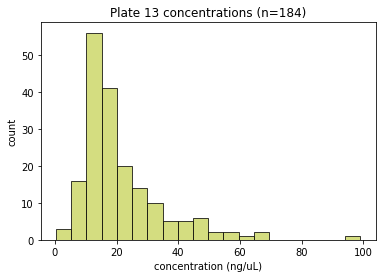

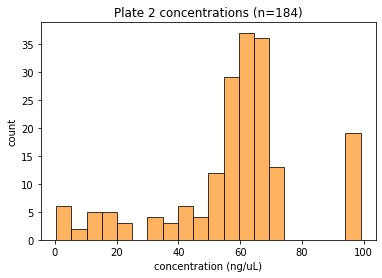

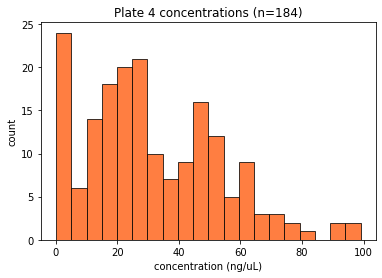

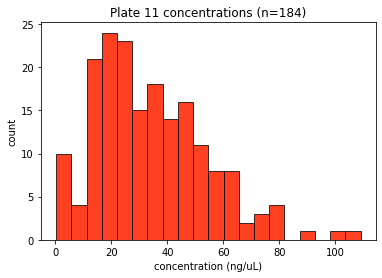

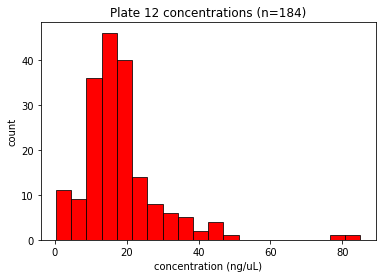

In [5]:
#First workup data for plate 7 only
# let's list the files that are in a directory of interest
dirName='/Volumes/GoogleDrive/My Drive/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/csv_files'
#generate list of files in directory
files = os.listdir(dirName)

list_of_conc_dfs=[]

n=(len(files))
color=iter(cm.rainbow(np.linspace(0,1,n)))

#pick new color for each histogram
    
# for i in range(n):
    

#import summary dataframes for each plate and concatenate
for a in files:
    c=next(color)

    #make list of char in file name (to later add sublibrary column)
    plate=(a.split('_'))[2]
    plate_int=(plate.split('.'))[0]
    df_name="plate_"+str(plate_int)+"_conc_df"
   
    #get path for csv
    file_path = open(dirName + '/'+a,'r')
    
    #import csv as dataframe, set plate number as index
    df=pd.read_csv(file_path)
    
    #iterate through dataframe to get well name
    well_list=[]
       
    for index, val in df.iterrows():
        well=str(val.well)
        well_list.append(well)
        
    df['well']=well_list
    
    df.set_index('well', inplace=True)
    df.replace('#VALUE!', 99, inplace=True)  
    df["stock_conc"] = pd.to_numeric(df["stock_conc"])

    df.hist(column='stock_conc', grid=False, bins=20, color = 'gray', edgecolor='black', linewidth=0.75)
    plt.title('Plate '+str(plate_int)+  ' concentrations (n='+str(len(df))+')')
    plt.xlabel('concentration (ng/uL)')
    plt.ylabel('count')
    plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/histograms/2020813_plate_'+str(plate_int)+'_concentrations.png')
    plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/histograms/2020813_plate_'+str(plate_int)+'_concentrations.pdf')

    
    list_of_conc_dfs.append(df)



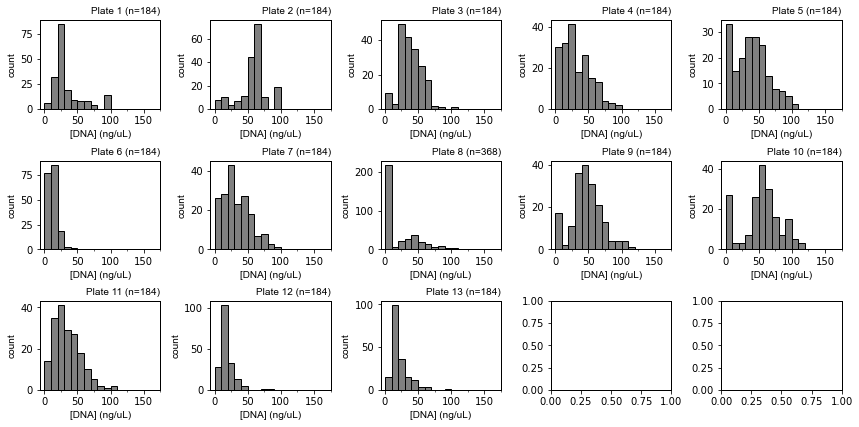

In [17]:
plt.rcParams['axes.linewidth'] = 1 #set the value globally
arialfont={'fontname':'Arial'}

# #First workup data for plate 7 only
# let's list the files that are in a directory of interest
dirName='/Volumes/GoogleDrive/My Drive/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/csv_files'
#generate list of files in directory
files = os.listdir(dirName)

list_of_conc_dfs=[]

n=(len(files))    

plate_range=np.arange(1,14)

fig, axs = plt.subplots(3, 5,figsize=(12,6), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.75, wspace=0.4)


#import summary dataframes for each plate and concatenate
for index, i in enumerate(plate_range):
    #define position of current subplot
    currentax = axs[index//5, index%5]
    
    #get sublibrary number
    plate_int=i
    
    #filename of csv data
    fileName='20200813_plate_'+str(i)+'.csv'

    #name df 
    df_name="plate_"+str(plate_int)+"_conc_df"
   
    #get path for csv
    file_path = open(dirName + '/'+fileName,'r')
    
    #import csv as dataframe, set plate number as index
    df=pd.read_csv(file_path)
    
    #iterate through dataframe to get well name
    well_list=[]
       
    for index, val in df.iterrows():
        well=str(val.well)
        well_list.append(well)
        
    df['well']=well_list
    df['plate']=plate_int
    df.name = plate_int
    df.set_index('well', inplace=True)
    df.replace('#VALUE!', 99, inplace=True)  
    df["stock_conc"] = pd.to_numeric(df["stock_conc"])
    
    conc_list=df["stock_conc"].tolist()

    currentax.hist(conc_list, bins=np.arange(0,140,10), color = 'gray', edgecolor='black', linewidth=1)
    currentax.annotate(('Plate '+str(plate_int)+' (n='+str(len(df))+')'), 
                       xy=(1, 1.15), 
                       xycoords='axes fraction', 
                       fontsize=10,
                       horizontalalignment='right', 
                       verticalalignment='top', **arialfont)
    currentax.set_xticks(np.arange(0,200,50), minor=False)
    currentax.set_xticks(np.arange(0,200,25), minor=True)
#     currentax.set_xticklabels(np.arange(0,200,50),fontsize=12, **arialfont) 
    currentax.set_xlabel('[DNA]'+' (ng/uL)', fontsize=10, **arialfont)
#     currentax.set_yticks(np.arange(0,200,25), minor=True)
#     currentax.set_yticklabels('',fontsize=12, **arialfont) 
    currentax.set_ylabel('count', fontsize=10, **arialfont)
    
    list_of_conc_dfs.append(df)
plt.tight_layout()
plt.savefig('/Users/mja/Appel_MutSequencing/2021_DNA_conc/histograms/20210616_plates_1-13_DNA_conc_hist.png')
plt.savefig('/Users/mja/Appel_MutSequencing/2021_DNA_conc/histograms/20210616_plates_1-13_DNA_conc_hist.pdf')


In [134]:
##Get summary stats for each DNA concentration plate

#make lists to store stats
medianL=[]
meanL=[]
stdevL=[]
lengthL=[]

plateL=np.arange(1,14)
dna_concDF=pd.DataFrame()

#loop through list of DFs and get median, mean, stdev
for i in list_of_conc_dfs:
    tempDF= i.copy()
    medianL.append(round(tempDF['stock_conc'].median(),0))
    meanL.append(round(tempDF['stock_conc'].mean(),0))
    stdevL.append(round(tempDF['stock_conc'].std(),0))
    lengthL.append(len(tempDF))


#Add to DF and export
dna_concDF['plate']=plateL
dna_concDF['count (of 384)']=lengthL
dna_concDF['median']=medianL
dna_concDF['mean']=meanL
dna_concDF['stdev']=stdevL

(dna_concDF.set_index('plate')).to_csv('/Users/mja/Appel_MutSequencing/2021_DNA_conc/stats/20210616_plates_1-13_DNA_conc_summary_stats.csv')

In [133]:
dna_concDF

,plate,count (of 384),median,mean,stdev
0,1,184,25.0,34.0,24.0
1,2,184,61.0,58.0,22.0
2,3,184,37.0,39.0,17.0
3,4,184,28.0,32.0,22.0
4,5,184,39.0,40.0,26.0
5,6,184,11.0,11.0,7.0
6,7,184,29.0,32.0,21.0
7,8,368,1.0,20.0,27.0
8,9,184,47.0,47.0,23.0
9,10,184,57.0,54.0,29.0


In [113]:
list_of_conc_dfs[0]

,stock_conc,plate
well,,
A1,23.877,1
A2,21.432,1
A3,26.271,1
A4,0.933,1
A5,26.322,1
...,...,...
O19,25.614,1
O20,17.109,1
O21,21.981,1


In [46]:
#create DF converting well positions in row/column format to positions 1-384
import string
row_list=list(string.ascii_uppercase)[0:16]
column_list=np.arange(1,25)

well_pos_list=[]

for row in row_list:
    for column in column_list:
        well_pos=row+str(column)
        well_pos_list.append(well_pos)
        
#make list of all wells in numerical format (1-384)

well_num_list=np.arange(1,385)


key_df=pd.DataFrame()

key_df['well']=well_pos_list
key_df['well_num']=well_num_list
key_df.set_index('well', inplace=True)

In [66]:
#merge with concentration dfs

list_of_joined_conc_dfs=[]
    
for index, val in enumerate(list_of_conc_dfs):
    df=(list_of_conc_dfs[index]).copy()
    
    joined = df.join(key_df)
    
#     joined.astype({'plate': 'str'},{'well_num': 'str'}).dtypes
    
#     total_rows['ColumnID'] = total_rows['ColumnID'].astype(str)
    
    joined['plate_well']=joined['plate'].astype(str)+"_"+joined['well_num'].astype(str)
    list_of_joined_conc_dfs.append(joined)

In [72]:
#merge with dataframe containing data for all plates
read_data=pd.read_csv('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/read_stats/20210101plates1to13_read_stats_allgenomes_plate_well.csv')


read_data['plate_well']=read_data['plate'].astype(str)+"_"+read_data['well'].astype(str)

read_data.set_index('plate_well', inplace=True)


list_of_joined_with_reads=[]

for index, val in enumerate(list_of_joined_conc_dfs):
    df=(list_of_joined_conc_dfs[index]).copy()
    df.set_index('plate_well', inplace=True)

    joined = df.join(read_data, lsuffix='left_', rsuffix='right_')
    
    list_of_joined_with_reads.append(joined)

    
list_of_joined_with_reads[1]

,stock_conc,plateleft_,well_num,Unnamed: 0,Sample_ID,Sample_full_name,i7,i5,Total_reads,Mapped_reads_spap,Mapped_reads_purexp,Mapped_reads_ecoli,Frac_spap_reads,Frac_purex+spap_reads,Frac_ecoli_reads,Frac_unmapped,plateright_,well
plate_well,,,,,,,,,,,,,,,,,,
6_25,2.110,6,25,1621.0,S2330,CZB-NXT-i7-04249-CZB-NXT-i5-03865_S2330_L001_s...,4249.0,3865.0,2264.0,2236.0,2236.0,0.0,0.99,0.99,0.00,0.01,6.0,25.0
6_26,11.170,6,26,319.0,S2331,CZB-NXT-i7-04250-CZB-NXT-i5-03866_S2331_L001_s...,4250.0,3866.0,1594.0,1579.0,1580.0,0.0,0.99,0.99,0.00,0.01,6.0,26.0
6_27,0.835,6,27,4578.0,S2332,CZB-NXT-i7-04251-CZB-NXT-i5-03867_S2332_L001_s...,4251.0,3867.0,2666.0,2638.0,2644.0,0.0,0.99,0.99,0.00,0.01,6.0,27.0
6_28,8.955,6,28,662.0,S2333,CZB-NXT-i7-04252-CZB-NXT-i5-03868_S2333_L001_s...,4252.0,3868.0,2626.0,2595.0,2603.0,0.0,0.99,0.99,0.00,0.01,6.0,28.0
6_29,13.360,6,29,1088.0,S2334,CZB-NXT-i7-04253-CZB-NXT-i5-03869_S2334_L001_s...,4253.0,3869.0,3416.0,3387.0,3390.0,0.0,0.99,0.99,0.00,0.01,6.0,29.0
6_30,11.025,6,30,2663.0,S2335,CZB-NXT-i7-04254-CZB-NXT-i5-03870_S2335_L001_s...,4254.0,3870.0,3588.0,3555.0,3552.0,0.0,0.99,0.99,0.00,0.01,6.0,30.0
6_31,8.075,6,31,3348.0,S2336,CZB-NXT-i7-04255-CZB-NXT-i5-03871_S2336_L001_s...,4255.0,3871.0,8.0,1.0,1.0,0.0,0.12,0.12,0.00,0.88,6.0,31.0
6_32,21.450,6,32,4222.0,S2337,CZB-NXT-i7-04256-CZB-NXT-i5-03872_S2337_L001_s...,4256.0,3872.0,2.0,0.0,0.0,0.0,0.00,0.00,0.00,1.00,6.0,32.0
6_33,13.275,6,33,1209.0,S2338,CZB-NXT-i7-04257-CZB-NXT-i5-03873_S2338_L001_s...,4257.0,3873.0,3036.0,3010.0,3013.0,0.0,0.99,0.99,0.00,0.01,6.0,33.0


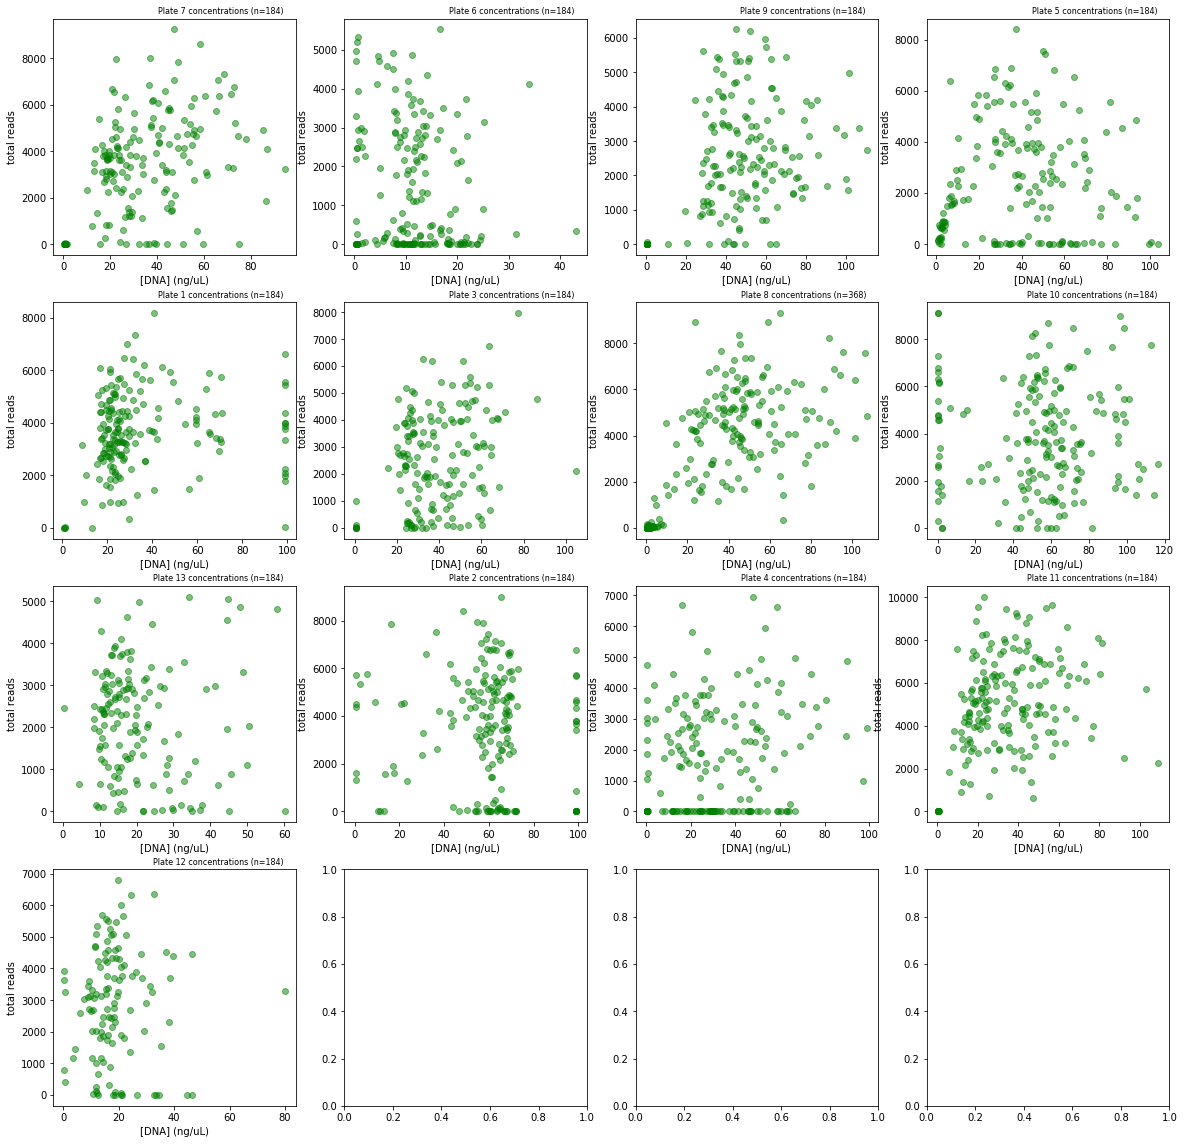

In [84]:

n=(len(files))
color=iter(cm.rainbow(np.linspace(0,1,n)))

#pick new color for each histogram

    
fig, axs = plt.subplots(4, 4,figsize=(20,20))


for index,a in enumerate(list_of_joined_with_reads):
    currentax = axs[index//4, index%4]
    c=next(color)
    df=list_of_joined_with_reads[index].copy()
   
    conc_list=df["stock_conc"].tolist()
    reads_list=df["Total_reads"].tolist()
    plate_int=df.iloc[0]['plateleft_']
    
    currentax.scatter(conc_list, reads_list, color='green',alpha=0.5)
#     currentax.set_yscale('log')
#     currentax.set_xscale('log')

#     currentax.scatter(conc_list, bins=20, color = c, edgecolor='black', linewidth=0.75)
    currentax.annotate(('Plate '+str(plate_int)+  ' concentrations (n='+str(len(df))+')'), xy=(0.95, 1.05), xycoords='axes fraction', fontsize=8,horizontalalignment='right', verticalalignment='top')

# #     currentax.set_xlim(0,110)
#     currentax.set_xticks(np.arange(0,130,10), minor=True)
    currentax.set_ylabel('total reads')
    currentax.set_xlabel('[DNA] (ng/uL)')

    

# plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/histograms/2020813_plate_'+str(plate_int)+'_concentrations_ALL_GRID.png')
# plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/20200811_picogreen_plates/histograms/2020813_plate_'+str(plate_int)+'_concentrations_ALL_GRID.pdf')

    
plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/read_stats/conc_data/2021_conc_total_reads_all.pdf')
plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/read_stats/conc_data/2021_conc_total_reads_all.png')


['plate_1.csv', 'plate_5.csv']


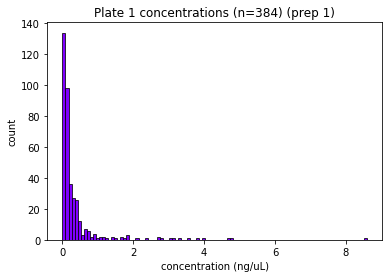

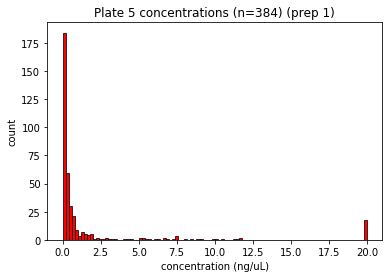

In [102]:
#First workup data for plate 7 only
# let's list the files that are in a directory of interest
dirName='/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/reformatted_picogreen_plates_1to4_RENUMBERED/csv_files/'
#generate list of files in directory
files = os.listdir(dirName)

list_of_conc_dfs=[]

n=(len(files))
color=iter(cm.rainbow(np.linspace(0,1,n)))

#pick new color for each histogram
    
# for i in range(n):

print (files)

#import summary dataframes for each plate and concatenate
for a in files:
    c=next(color)

    #make list of char in file name (to later add sublibrary column)
    plate=(a.split('_'))[1]
    plate_int=(plate.split('.'))[0]
    df_name="plate_"+str(plate_int)+"_conc_df"
   
    #get path for csv
    file_path = open(dirName + '/'+a,'r')
    
    #import csv as dataframe, set plate number as index
    df=pd.read_csv(file_path)
    
    #iterate through dataframe to get well name
    well_list=[]
       
    for index, val in df.iterrows():
        well=str(val.well)
        well_list.append(well)
        
    df['well']=well_list
    
    df.set_index('well', inplace=True)
    df.replace('#VALUE!', 20, inplace=True)
    df.replace('?????', 20, inplace=True)
    df.replace('<0.009', 0, inplace=True)  


    df["stock_conc"] = pd.to_numeric(df["stock_conc"])

    df.hist(column='stock_conc', grid=False, bins=100, color = c, edgecolor='black', linewidth=0.75)
    plt.title('Plate '+str(plate_int)+  ' concentrations (n='+str(len(df))+')'+' (prep 1)')
    plt.xlabel('concentration (ng/uL)')
    plt.ylabel('count')
    plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/reformatted_picogreen_plates_1to4_RENUMBERED/histograms/202003_plate_'+str(plate_int)+'_concentrations.png')

    
    list_of_conc_dfs.append(df)



In [67]:
list_of_conc_dfs

[      stock_conc
 well            
 A1        18.390
 A2        24.745
 A3        18.890
 A4        34.150
 A5        19.060
 ...          ...
 O19       22.990
 O20       43.815
 O21       10.235
 O22       46.680
 O23       12.395
 
 [184 rows x 1 columns],       stock_conc
 well            
 B1         2.110
 B2        11.170
 B3         0.835
 B4         8.955
 B5        13.360
 ...          ...
 P19        9.715
 P20       11.600
 P21        0.595
 P22       11.300
 P23       14.675
 
 [184 rows x 1 columns],       stock_conc
 well            
 A1        45.930
 A2        40.380
 A3        76.570
 A4         0.575
 A5        43.820
 ...          ...
 O19       56.895
 O20       31.670
 O21       50.615
 O22       26.785
 O23       51.200
 
 [184 rows x 1 columns],       stock_conc
 well            
 A1         3.450
 A2        73.080
 A3        59.810
 A4        59.660
 A5        93.020
 ...          ...
 O19       58.695
 O20       57.810
 O21       27.520
 O22       42.010
 O23

## 2. Import csvs containing mapped reads and join with [DNA] data

In [3]:
#First workup data for plate 7 only
# let's list the files that are in a directory of interest
dirName='/home/mason/Desktop/2020_spap_val_seq/workup_results/read_stats/read_stats_allgenomes_csvs'
#generate list of files in directory
files = os.listdir(dirName)

dict_of_cov_dfs={}

#make lists of sequencing plates to map to concentration plates
conc_plate_1_list=[1,2]
conc_plate_2_list=[3,4]
conc_plate_3_list=[5]
conc_plate_4_list=[6,7]




#import summary dataframes for each plate and concatenate
for a in files:
    #make list of char in file name (to later add sublibrary column)
    plate_int=int(list(sliced(a,1))[5])
    
    df_name="plate_"+str(plate_int)+"_reads_df"
   
    
    #get path for csv
    file_path = open(dirName + '/'+a,'r')
    
    
    #import csv as dataframe, set plate number as index
    df=pd.read_csv(file_path)
    
  
    df.drop(columns=['Unnamed: 0'], inplace=True)
    
    df.set_index('well', inplace=True)
    
    
    if plate_int in conc_plate_1_list:
        joined_df=df.join(plate1_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_2_list:
        joined_df=df.join(plate2_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_3_list:
        joined_df=df.join(plate3_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_4_list:
        joined_df=df.join(plate4_conc_df)
        dict_of_cov_dfs[df_name]=joined_df        
dict_of_cov_dfs

{'plate_2_reads_df':                                        Sample_full_name    i7    i5  \
 well                                                                  
 257   CZB-NXT-i7-02945-CZB-NXT-i5-02561_S642_L001_sp...  2945  2561   
 112   CZB-NXT-i7-02800-CZB-NXT-i5-02416_S497_L001_sp...  2800  2416   
 307   CZB-NXT-i7-02995-CZB-NXT-i5-02611_S692_L001_sp...  2995  2611   
 251   CZB-NXT-i7-02939-CZB-NXT-i5-02555_S636_L001_sp...  2939  2555   
 63    CZB-NXT-i7-02751-CZB-NXT-i5-02367_S448_L001_sp...  2751  2367   
 ...                                                 ...   ...   ...   
 73    CZB-NXT-i7-02761-CZB-NXT-i5-02377_S458_L001_sp...  2761  2377   
 303   CZB-NXT-i7-02991-CZB-NXT-i5-02607_S688_L001_sp...  2991  2607   
 360   CZB-NXT-i7-03048-CZB-NXT-i5-02664_S745_L001_sp...  3048  2664   
 233   CZB-NXT-i7-02921-CZB-NXT-i5-02537_S618_L001_sp...  2921  2537   
 46    CZB-NXT-i7-02734-CZB-NXT-i5-02350_S431_L001_sp...  2734  2350   
 
       Total_reads  Mapped_reads_spap  Map

## 3. Make plots using dict containing joined PDFs (TOTAL READS)

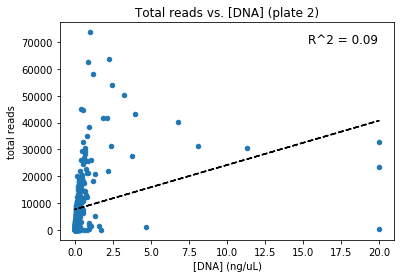

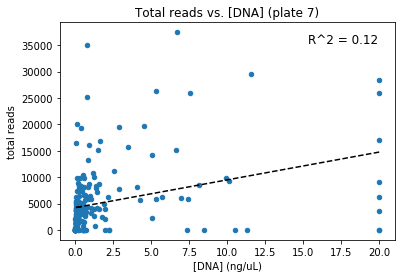

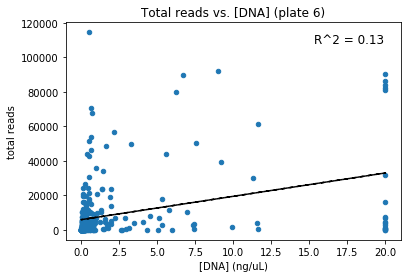

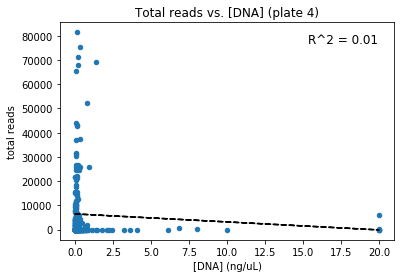

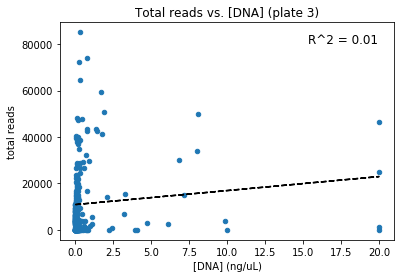

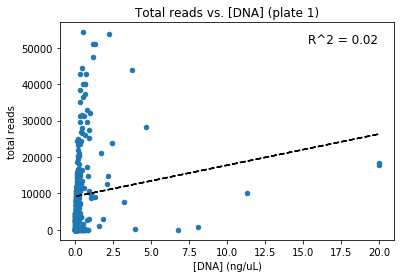

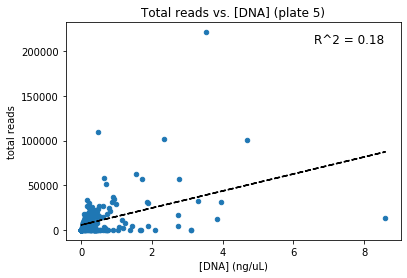

In [5]:
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/total_reads/'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    

    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='Total_reads')
    plt.ylabel('total reads')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('Total reads vs. [DNA] ('+name+')')
    

    
    #add linear regression line
    x=value['dna_conc_ng_ul']
    y=value['Total_reads']
    m, b = np.polyfit(x, y, 1)
    
    plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
    #calculate r squared
    correlation = np.corrcoef(x, y)[0,1]
    rsq = round(correlation**2,2)
    
    plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
         verticalalignment='top',
         transform=ax1.transAxes)
    
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc.png'))
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc.eps'))



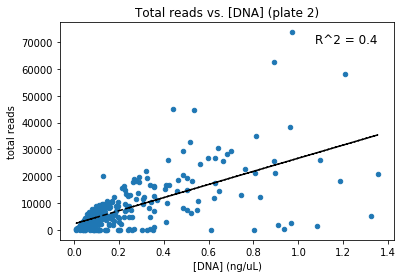

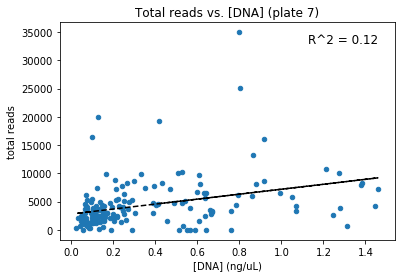

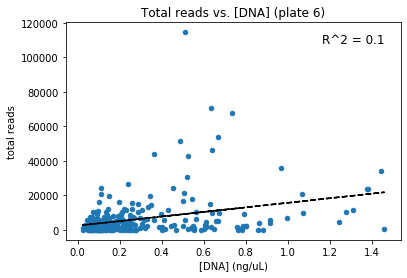

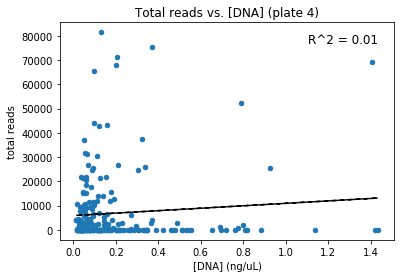

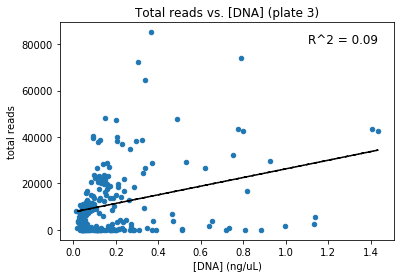

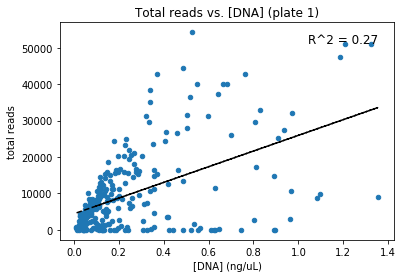

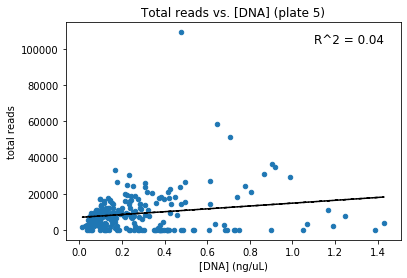

In [214]:

#repeat but limit fitting range to lower [DNA] 
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/total_reads/range_limit/'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    
    #select rows with DNA conc lower than specified value
    value = value[value['dna_conc_ng_ul'] <= 1.5]
    value = value[value['dna_conc_ng_ul'] > 0.01]  

    
    
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    

    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='Total_reads')
    plt.ylabel('total reads')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('Total reads vs. [DNA] ('+name+')')
    


    
    #add linear regression line
    x=value['dna_conc_ng_ul']
    y=value['Total_reads']
    m, b = np.polyfit(x, y, 1)
    
    plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
    #calculate r squared
    correlation = np.corrcoef(x, y)[0,1]
    rsq = round(correlation**2,2)
    
    plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
         verticalalignment='top',
         transform=ax1.transAxes)
    
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc_range_limit.png'))
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc_range_limit.eps'))

## 4. Make plots using dict containing joined PDFs (SPAP ORF READS ONLY)

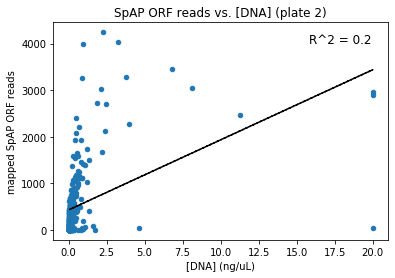

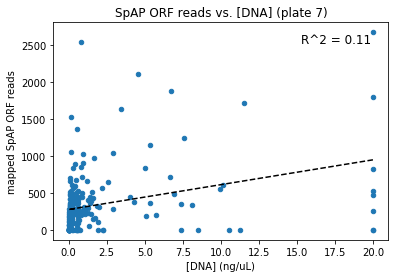

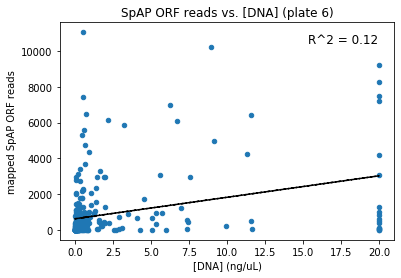

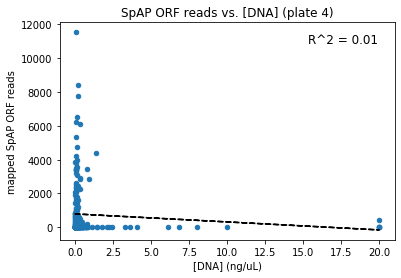

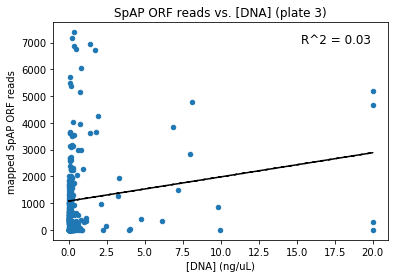

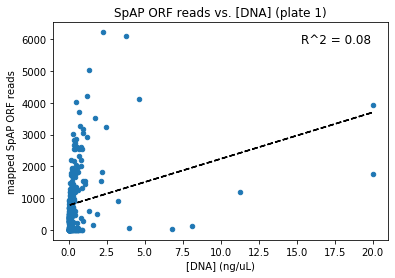

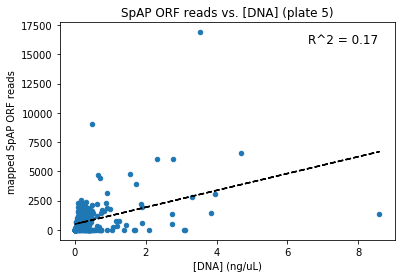

In [202]:
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/spap_orf_reads/'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    

    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='Mapped_reads_spap')
    plt.ylabel('mapped SpAP ORF reads')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('SpAP ORF reads vs. [DNA] ('+name+')')
    

    
    #add linear regression line
    x=value['dna_conc_ng_ul']
    y=value['Mapped_reads_spap']
    m, b = np.polyfit(x, y, 1)
    
    plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
    #calculate r squared
    correlation = np.corrcoef(x, y)[0,1]
    rsq = round(correlation**2,2)
    
    plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
         verticalalignment='top',
         transform=ax1.transAxes)
    
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_reads_dna_conc.png'))
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_reads_dna_conc.eps'))



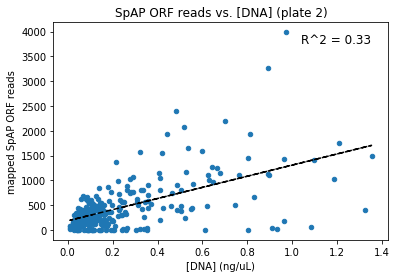

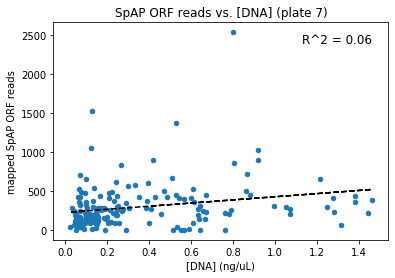

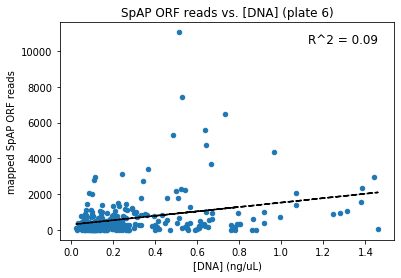

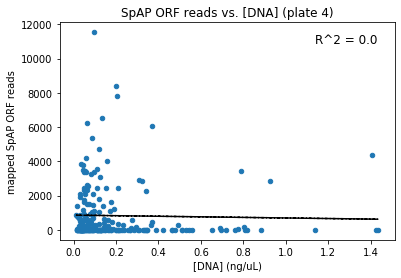

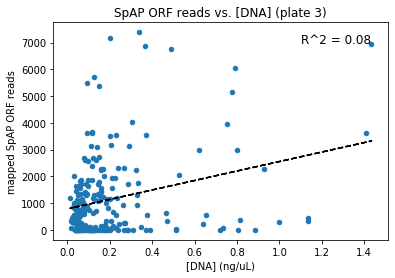

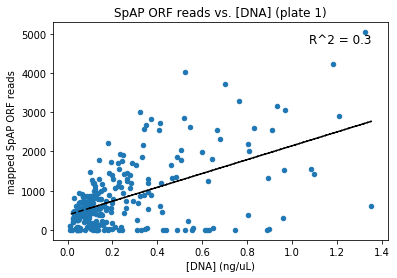

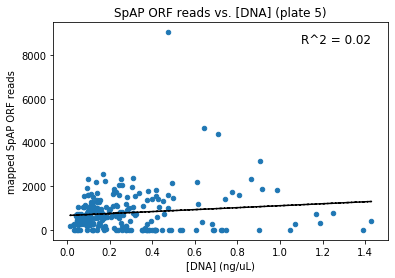

In [215]:
#range limited
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/spap_orf_reads/range_limit'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    
    #select rows with DNA conc lower than specified value
    value = value[value['dna_conc_ng_ul'] <= 1.5]
    value = value[value['dna_conc_ng_ul'] > 0.01]  
    

    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='Mapped_reads_spap')
    plt.ylabel('mapped SpAP ORF reads')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('SpAP ORF reads vs. [DNA] ('+name+')')
    

    
    #add linear regression line
    x=value['dna_conc_ng_ul']
    y=value['Mapped_reads_spap']
    m, b = np.polyfit(x, y, 1)
    
    plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
    #calculate r squared
    correlation = np.corrcoef(x, y)[0,1]
    rsq = round(correlation**2,2)
    
    plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
         verticalalignment='top',
         transform=ax1.transAxes)
    
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_reads_dna_conc_range_limit.png'))
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_reads_dna_conc_range_limit.eps'))



## 5. Import csvs containing average coverage of SpAP and join with [DNA] data

In [219]:
#First workup data for plate 7 only
# let's list the files that are in a directory of interest
dirName='/home/mason/Desktop/2020_spap_val_seq/workup_results/coverage_stats/av_cov_by_plate_spap/'
#generate list of files in directory
files = os.listdir(dirName)

dict_of_cov_dfs={}

#make lists of sequencing plates to map to concentration plates
conc_plate_1_list=[1,2]
conc_plate_2_list=[3,4]
conc_plate_3_list=[5]
conc_plate_4_list=[6,7]


#import summary dataframes for each plate and concatenate
for a in files:
    #make list of char in file name (to later add sublibrary column)
    plate_int=int(list(sliced(a,1))[5])
    
    df_name="plate_"+str(plate_int)+"_reads_df"
   
    
    #get path for csv
    file_path = open(dirName + '/'+a,'r')
    
    
    #import csv as dataframe, set plate number as index
    df=pd.read_csv(file_path)
    
  
   
    df.set_index('well', inplace=True)
    
    
    if plate_int in conc_plate_1_list:
        joined_df=df.join(plate1_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_2_list:
        joined_df=df.join(plate2_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_3_list:
        joined_df=df.join(plate3_conc_df)
        dict_of_cov_dfs[df_name]=joined_df
        
    if plate_int in conc_plate_4_list:
        joined_df=df.join(plate4_conc_df)
        dict_of_cov_dfs[df_name]=joined_df        
dict_of_cov_dfs

{'plate_7_reads_df':         i7                                   Sample_full_name  \
 well                                                            
 144   2832  CZB-NXT-i7-02832_CZB-NXT-i5-02448_S145_L001_sp...   
 21    2709  CZB-NXT-i7-02709_CZB-NXT-i5-02325_S22_L001_spa...   
 101   2789  CZB-NXT-i7-02789_CZB-NXT-i5-02405_S102_L001_sp...   
 100   2788  CZB-NXT-i7-02788_CZB-NXT-i5-02404_S101_L001_sp...   
 26    2714  CZB-NXT-i7-02714_CZB-NXT-i5-02330_S27_L001_spa...   
 ...    ...                                                ...   
 107   2795  CZB-NXT-i7-02795_CZB-NXT-i5-02411_S108_L001_sp...   
 251   2939  CZB-NXT-i7-02939_CZB-NXT-i5-02555_S252_L001_sp...   
 200   2888  CZB-NXT-i7-02888_CZB-NXT-i5-02504_S201_L001_sp...   
 65    2753  CZB-NXT-i7-02753_CZB-NXT-i5-02369_S66_L001_spa...   
 212   2900  CZB-NXT-i7-02900_CZB-NXT-i5-02516_S213_L001_sp...   
 
       average_coverage  median_coverage  frac_pos_cov=0  frac_pos_cov>=10  \
 well                                     

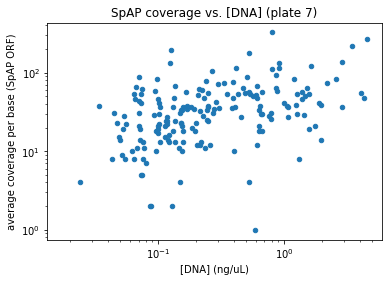

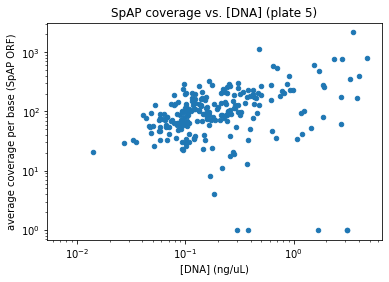

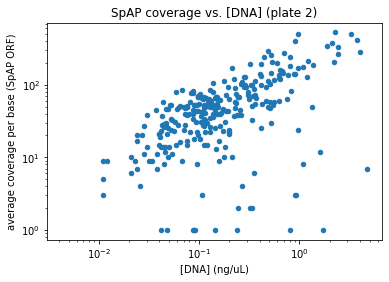

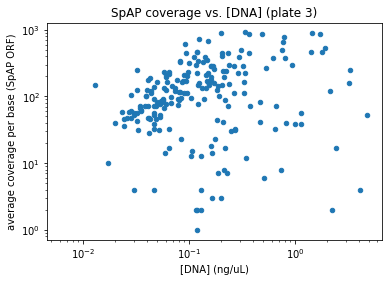

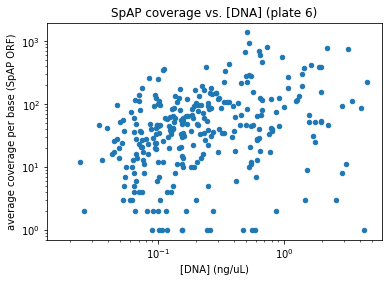

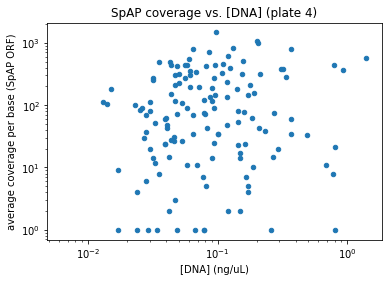

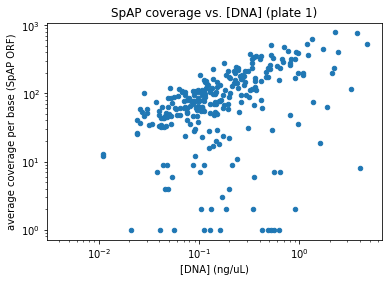

In [239]:
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/spap_orf_reads/'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    
    
#     #select rows with DNA conc lower than specified value

    value = value[value['average_coverage'] > 0]
    value = value[value['dna_conc_ng_ul'] <= 5]
    value = value[value['dna_conc_ng_ul'] > 0.01]  
    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='average_coverage')
    plt.ylabel('average coverage per base (SpAP ORF)')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('SpAP coverage vs. [DNA] ('+name+')')
    
    #set log scales if desired
    ax1.set_yscale('log')
    ax1.set_xscale('log')

    
#     #add linear regression line
#     x=value['dna_conc_ng_ul']
#     y=value['average_coverage']
#     m, b = np.polyfit(x, y, 1)
    
#     plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
#     #calculate r squared
#     correlation = np.corrcoef(x, y)[0,1]
#     rsq = round(correlation**2,2)
    
#     plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
#          verticalalignment='top',
#          transform=ax1.transAxes)
    
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_coverage_dna_conc_range_lower.png'))
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_coverage_dna_conc_range_lower.eps'))


## 6. Plotting and fitting on log scale

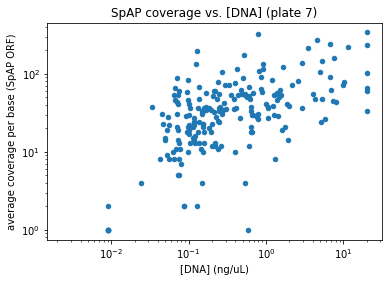

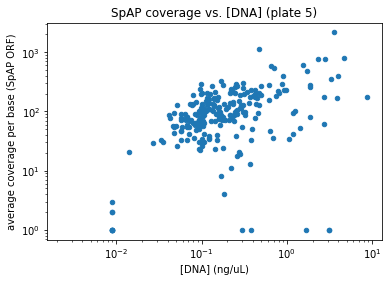

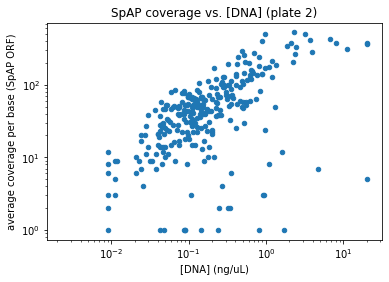

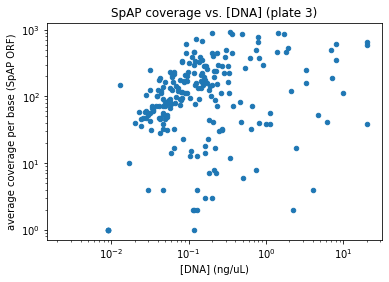

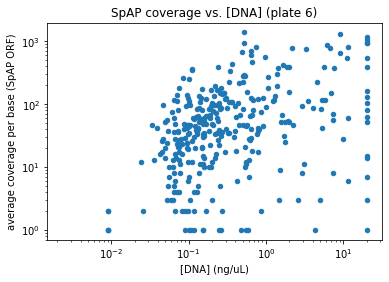

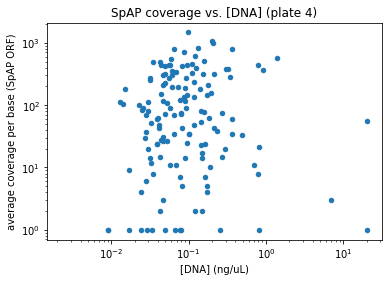

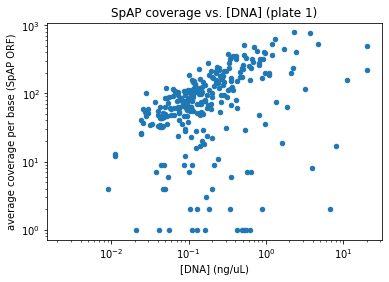

In [255]:
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/spap_orf_reads/log_plots/'
from scipy.stats import linregress

#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    
    
#     #select rows with DNA conc lower than specified value

    value = value[value['average_coverage'] > 0]
#     value = value[value['dna_conc_ng_ul'] <= 5]
#     value = value[value['dna_conc_ng_ul'] > 0.01]  
    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='average_coverage')
    plt.ylabel('average coverage per base (SpAP ORF)')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('SpAP coverage vs. [DNA] ('+name+')')
    
    #set log scales if desired
    ax1.set_yscale('log')
    ax1.set_xscale('log')

    
#     #add linear regression line LOG10
#     x=value['dna_conc_ng_ul']
#     y=value['average_coverage']
#     m, b = np.polyfit(x, y, 1)
    
#     plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
    
#     slope, intercept, r_value, p_value, std_err = linregress(np.log10(x), np.log10(y))

#     xfid = np.linspace(0,1000)     # This is just a set of x to plot the straight line 

#     plt.plot(xfid, xfid*slope+intercept)
   
    
#     #calculate r squared
#     correlation = np.corrcoef(x, y)[0,1]
#     rsq = round(correlation**2,2)
    
#     plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
#          verticalalignment='top',
#          transform=ax1.transAxes)
    
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_coverage_dna_conc_log10.png'))
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'spap_orf_coverage_dna_conc_log10.eps'))


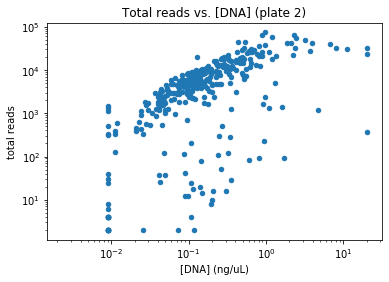

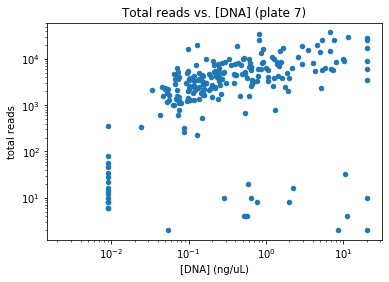

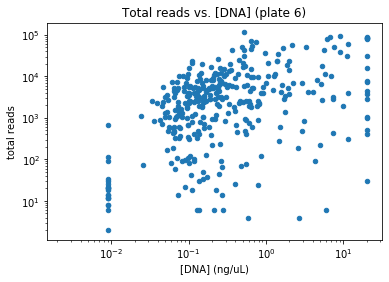

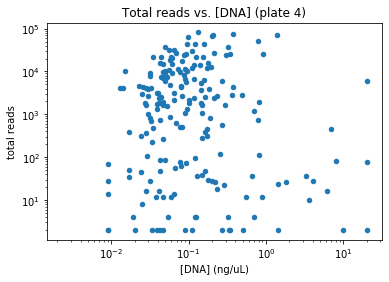

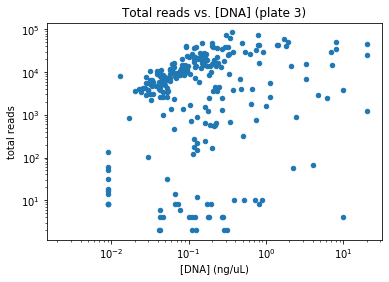

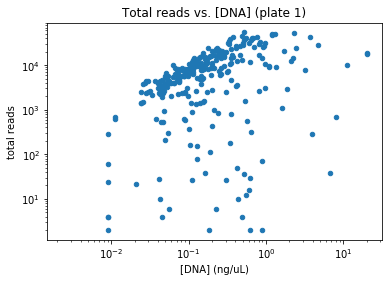

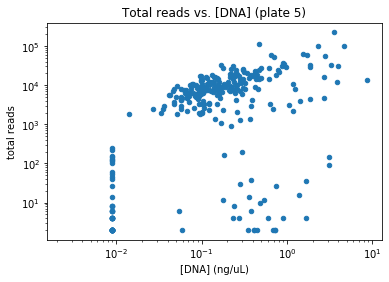

In [6]:
#iterate through dictionary and plot histograms
fig_dir='/home/mason/Desktop/2020_spap_val_seq/workup_results/dna_conc_plots/total_reads/log_plots/'


#plot histograms of total reads vs [DNA]
for key, value in dict_of_cov_dfs.items():
    name_list=str(key).split('_')
    name=name_list[0]+" "+name_list[1]
    value = value[value['Total_reads'] > 0]


    
    
    ax1 = value.plot.scatter(x='dna_conc_ng_ul',
                          y='Total_reads')
    plt.ylabel('total reads')
    plt.xlabel('[DNA] (ng/uL)')
    plt.title('Total reads vs. [DNA] ('+name+')')
    
    
    #set log scales if desired
    ax1.set_yscale('log')
    ax1.set_xscale('log')


    
#     #add linear regression line
#     x=value['dna_conc_ng_ul']
#     y=value['Total_reads']
#     m, b = np.polyfit(x, y, 1)
    
#     plt.plot(x, m*x + b, c='black',linestyle='dashed')
    
#     #calculate r squared
#     correlation = np.corrcoef(x, y)[0,1]
#     rsq = round(correlation**2,2)
    
#     plt.text(0.95, 0.95, 'R^2 = ' + str(rsq), fontsize=12,horizontalalignment='right',
#          verticalalignment='top',
#          transform=ax1.transAxes)
    
    plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc_log10.png'))
#     plt.savefig(fig_dir+str(name_list[0])+str(name_list[1]+'total_reads_dna_conc_log10.eps'))

